In [111]:
import numpy as np, pandas as pd
import os,glob, re
%matplotlib inline

dfs = {re.search('([a-zA-Z_]*)\.csv', fn).group(1):pd.read_csv(fn) for fn in glob.glob(os.getcwd()+'//Raw//*.csv')}
print('data frames read:{}'.format(list(dfs.keys())))

print('local variables with the same names are created.')
for k, v in dfs.items(): locals()[k] = v

data frames read:['air_reserve', 'air_store_info', 'air_visit_data', 'date_info', 'hpg_reserve', 'hpg_store_info', 'sample_submission', 'store_id_relation']
local variables with the same names are created.


In [2]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [3]:
air_reserve['visit_datetime']  = pd.to_datetime(air_reserve['visit_datetime'])
air_reserve['reserve_datetime'] = pd.to_datetime(air_reserve['reserve_datetime']) 
air_reserve['day_diff']  = (air_reserve['visit_datetime'] - air_reserve['reserve_datetime']).dt.days
air_reserve['time_diff']  = abs(air_reserve['visit_datetime'] - air_reserve['reserve_datetime']).astype('timedelta64[h]')
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,day_diff,time_diff
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,0,3.0
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,0,0.0
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,0,0.0
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,0,4.0
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,0,19.0


In [4]:
air_reserve.dtypes

air_store_id                object
visit_datetime      datetime64[ns]
reserve_datetime    datetime64[ns]
reserve_visitors             int64
day_diff                     int64
time_diff                  float64
dtype: object

In [5]:
def get_meal_type(hr):    
    if hr > 6 and hr <= 11:
        return 'breakfast'
    if hr >11 and hr <= 17:
        return 'lunch'
    if hr >17 and hr <= 23:
        return 'dinner'
    return 'midnight'
    
air_reserve['meal_type'] = air_reserve['visit_datetime'].dt.hour.apply(lambda x: get_meal_type(x))

In [6]:
air_reserve['visit_date'] = air_reserve.visit_datetime.dt.date.astype(str)

In [55]:
raw_combined_data = air_visit_data.merge(air_reserve,how = 'right',on = ['air_store_id','visit_date'])

In [56]:
combined_data = raw_combined_data.copy()

In [57]:
combined_data.head()

,air_store_id,visit_date,visitors,visit_datetime,reserve_datetime,reserve_visitors,day_diff,time_diff,meal_type
0,air_35512c42db0868da,2016-02-27,6.0,2016-02-27 22:00:00,2016-02-27 21:00:00,12,0,1.0,dinner
1,air_ee3a01f0c71a769f,2016-01-04,61.0,2016-01-04 15:00:00,2016-01-04 11:00:00,2,0,4.0,lunch
2,air_ee3a01f0c71a769f,2016-01-08,21.0,2016-01-08 19:00:00,2016-01-06 14:00:00,3,2,53.0,dinner
3,air_ee3a01f0c71a769f,2016-01-09,57.0,2016-01-09 11:00:00,2016-01-06 13:00:00,1,2,70.0,breakfast
4,air_ee3a01f0c71a769f,2016-01-09,57.0,2016-01-09 11:00:00,2016-01-07 19:00:00,2,1,40.0,breakfast


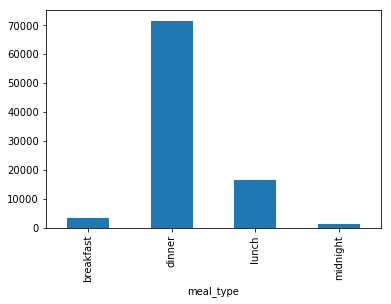

In [58]:
combined_data.groupby(['meal_type'])['air_store_id'].count().plot(kind = 'bar')

In [59]:
meal_info =combined_data.groupby(['air_store_id','meal_type'])['meal_type'].count().unstack('air_store_id').T.fillna(0)
meal_info.head()#.plot(kind='bar', stacked=True)#['air_store_id']].plot(kind='bar', stacked=True)

meal_type,breakfast,dinner,lunch,midnight
air_store_id,,,,
air_00a91d42b08b08d9,0.0,10.0,2.0,0.0
air_0164b9927d20bcc3,1.0,145.0,2.0,5.0
air_034a3d5b40d5b1b1,0.0,6.0,8.0,0.0
air_03963426c9312048,0.0,770.0,497.0,0.0
air_04341b588bde96cd,0.0,10.0,1.0,1.0


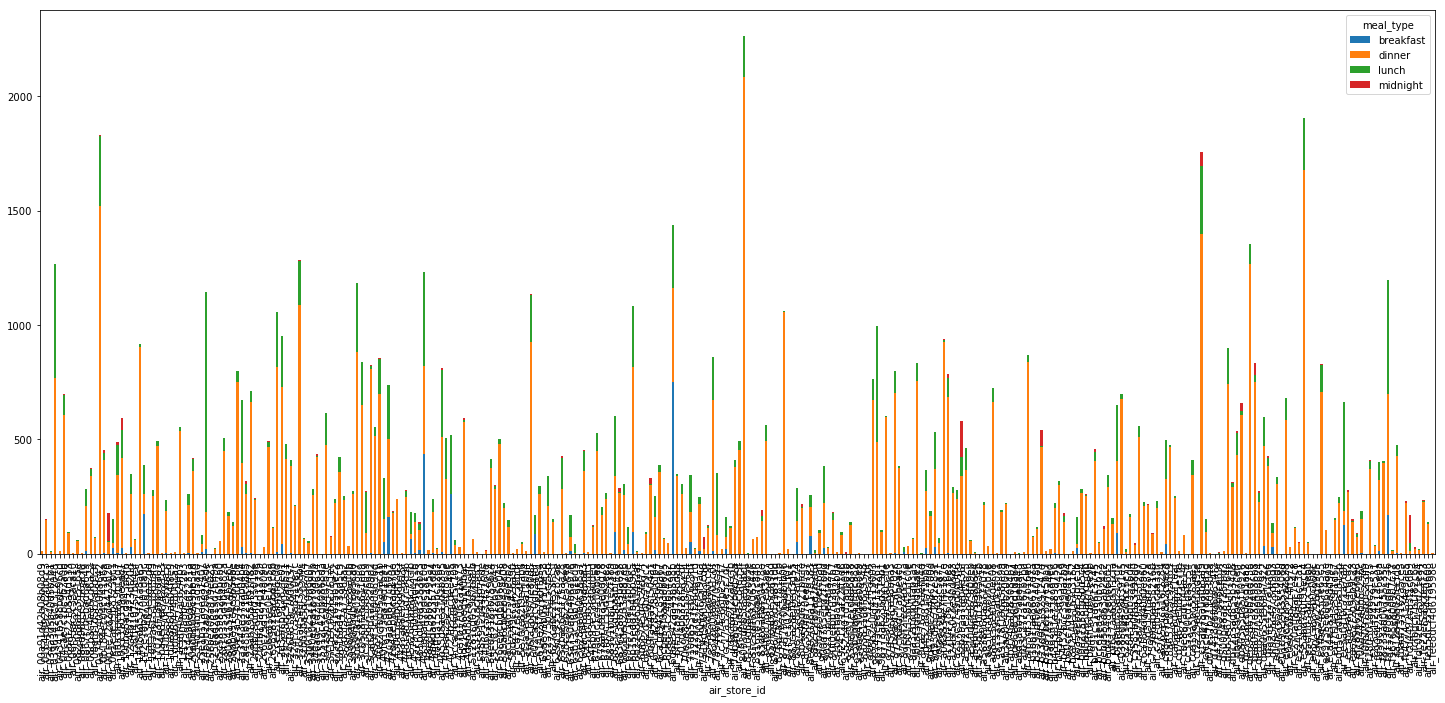

In [60]:
meal_info.plot(kind='bar', stacked=True,figsize=(25,10))#['air_store_id']].plot(kind='bar', stacked=True)

In [61]:
air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [62]:
combined_data['reserved_before'] = combined_data['day_diff']*24 + combined_data['time_diff']
combined_data.head()

,air_store_id,visit_date,visitors,visit_datetime,reserve_datetime,reserve_visitors,day_diff,time_diff,meal_type,reserved_before
0,air_35512c42db0868da,2016-02-27,6.0,2016-02-27 22:00:00,2016-02-27 21:00:00,12,0,1.0,dinner,1.0
1,air_ee3a01f0c71a769f,2016-01-04,61.0,2016-01-04 15:00:00,2016-01-04 11:00:00,2,0,4.0,lunch,4.0
2,air_ee3a01f0c71a769f,2016-01-08,21.0,2016-01-08 19:00:00,2016-01-06 14:00:00,3,2,53.0,dinner,101.0
3,air_ee3a01f0c71a769f,2016-01-09,57.0,2016-01-09 11:00:00,2016-01-06 13:00:00,1,2,70.0,breakfast,118.0
4,air_ee3a01f0c71a769f,2016-01-09,57.0,2016-01-09 11:00:00,2016-01-07 19:00:00,2,1,40.0,breakfast,64.0


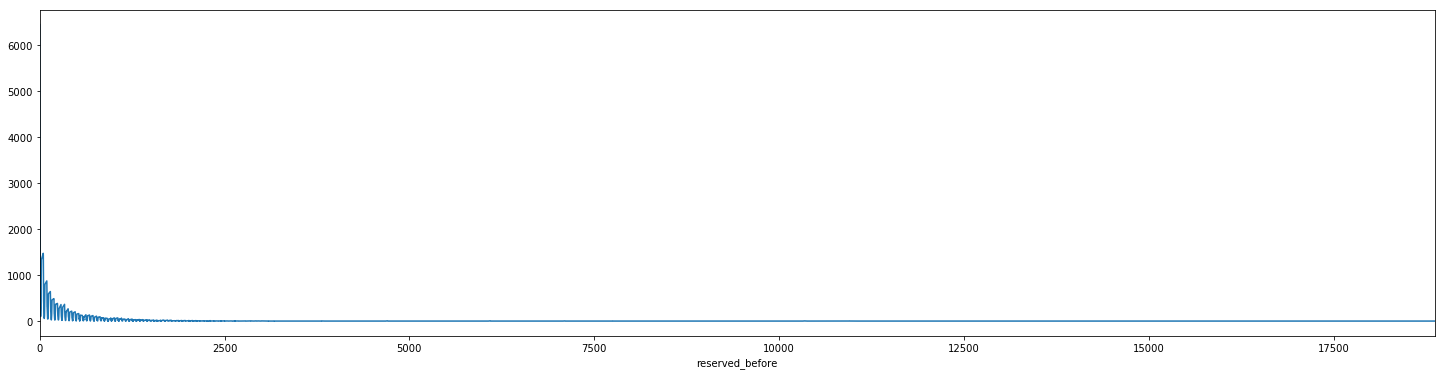

In [63]:
combined_data.groupby('reserved_before')['reserved_before'].count().plot(figsize = (25,6))

In [73]:
merged = combined_data.merge(date_info,how = 'left',left_on='visit_date',right_on='calendar_date')

In [74]:
merged.head()

,air_store_id,visit_date,visitors,visit_datetime,reserve_datetime,reserve_visitors,day_diff,time_diff,meal_type,reserved_before,calendar_date,day_of_week,holiday_flg
0,air_35512c42db0868da,2016-02-27,6.0,2016-02-27 22:00:00,2016-02-27 21:00:00,12,0,1.0,dinner,1.0,2016-02-27,Saturday,0
1,air_ee3a01f0c71a769f,2016-01-04,61.0,2016-01-04 15:00:00,2016-01-04 11:00:00,2,0,4.0,lunch,4.0,2016-01-04,Monday,0
2,air_ee3a01f0c71a769f,2016-01-08,21.0,2016-01-08 19:00:00,2016-01-06 14:00:00,3,2,53.0,dinner,101.0,2016-01-08,Friday,0
3,air_ee3a01f0c71a769f,2016-01-09,57.0,2016-01-09 11:00:00,2016-01-06 13:00:00,1,2,70.0,breakfast,118.0,2016-01-09,Saturday,0
4,air_ee3a01f0c71a769f,2016-01-09,57.0,2016-01-09 11:00:00,2016-01-07 19:00:00,2,1,40.0,breakfast,64.0,2016-01-09,Saturday,0


In [75]:
merged.drop(['visit_datetime','reserve_datetime','day_diff','time_diff','calendar_date'],axis = 1,inplace = True)

In [77]:
merged

,air_store_id,visit_date,visitors,reserve_visitors,meal_type,reserved_before,day_of_week,holiday_flg
0,air_35512c42db0868da,2016-02-27,6.0,12,dinner,1.0,Saturday,0
1,air_ee3a01f0c71a769f,2016-01-04,61.0,2,lunch,4.0,Monday,0
2,air_ee3a01f0c71a769f,2016-01-08,21.0,3,dinner,101.0,Friday,0
3,air_ee3a01f0c71a769f,2016-01-09,57.0,1,breakfast,118.0,Saturday,0
4,air_ee3a01f0c71a769f,2016-01-09,57.0,2,breakfast,64.0,Saturday,0
5,air_ee3a01f0c71a769f,2016-01-09,57.0,3,breakfast,23.0,Saturday,0
6,air_ee3a01f0c71a769f,2016-01-09,57.0,2,lunch,2.0,Saturday,0
7,air_ee3a01f0c71a769f,2016-01-09,57.0,2,lunch,359.0,Saturday,0
8,air_ee3a01f0c71a769f,2016-01-09,57.0,2,lunch,146.0,Saturday,0
9,air_ee3a01f0c71a769f,2016-01-09,57.0,2,lunch,69.0,Saturday,0


In [105]:
date_info

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0
5,2016-01-06,Wednesday,0
6,2016-01-07,Thursday,0
7,2016-01-08,Friday,0
8,2016-01-09,Saturday,0
9,2016-01-10,Sunday,0


In [120]:
day_b4_holiday

,calendar_date,day_of_week,holiday_flg,lagged,dayb4holiday
9,2016-01-10,Sunday,0,1.0,0
40,2016-02-10,Wednesday,0,1.0,0
78,2016-03-19,Saturday,0,1.0,0
118,2016-04-28,Thursday,0,1.0,0
122,2016-05-02,Monday,0,1.0,0
198,2016-07-17,Sunday,0,1.0,0
222,2016-08-10,Wednesday,0,1.0,0
224,2016-08-12,Friday,0,1.0,0
261,2016-09-18,Sunday,0,1.0,0
264,2016-09-21,Wednesday,0,1.0,0


In [138]:
date_info['lagged'] = date_info['holiday_flg'].shift(-1)
day_b4_holiday = (date_info['holiday_flg'] == 0) & (date_info['lagged'] == 1.0) & (date_info['day_of_week'] not in ['Sunday','Saturday'])
date_info['dayb4holiday'] = 0
date_info.loc[day_b4_holiday,'dayb4holiday'] = 1
date_info.drop('lagged',axis = 1, inplace = True)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [129]:
date_info

,calendar_date,day_of_week,holiday_flg,dayb4holiday,lagged
0,2016-01-01,Friday,1,0,1.0
1,2016-01-02,Saturday,1,0,1.0
2,2016-01-03,Sunday,1,0,0.0
3,2016-01-04,Monday,0,0,0.0
4,2016-01-05,Tuesday,0,0,0.0
5,2016-01-06,Wednesday,0,0,0.0
6,2016-01-07,Thursday,0,0,0.0
7,2016-01-08,Friday,0,0,0.0
8,2016-01-09,Saturday,0,0,0.0
9,2016-01-10,Sunday,0,1,1.0
